Imports

In [18]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 0 - Getting the Data

In [4]:
df = pd.read_csv('iris.data',
names=['sepal_length','sepal_width','petal_length','petal_width','target'])

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
154,6.3,2.5,5.0,1.9,Iris-virginica
155,6.5,3.0,5.2,2.0,Iris-virginica
156,6.5,3.0,5.2,2.0,NaN
157,6.2,3.4,5.4,2.3,Iris-virginica


# 1 - Missing Data

In [6]:
nan_sepal_length = df['sepal_length'].isna().sum()
nan_sepal_width = df['sepal_width'].isna().sum()
nan_petal_length = df['petal_length'].isna().sum()
nan_petal_width = df['petal_width'].isna().sum()

print("number of NANs in sepal length attribute: ", nan_sepal_length)
print("number of NANs in sepal width attribute: ", nan_sepal_width)
print("number of NANs in petal length attribute: ", nan_petal_length)
print("number of NANs in petal width attribute: ", nan_petal_width)

number of NANs in sepal length attribute:  2
number of NANs in sepal width attribute:  0
number of NANs in petal length attribute:  2
number of NANs in petal width attribute:  3


Because the number of NANs are very small, we can drop these rows from our dataset.

In [7]:
df = df.dropna()
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
153,6.7,3.0,5.2,2.3,Iris-virginica
154,6.3,2.5,5.0,1.9,Iris-virginica
155,6.5,3.0,5.2,2.0,Iris-virginica
157,6.2,3.4,5.4,2.3,Iris-virginica


# 2 - Non-numeric values

In [8]:
le = preprocessing.LabelEncoder()
le.fit(["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

LabelEncoder()

In [9]:
list(le.classes_)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [10]:
df['target'] = le.fit_transform(df['target'])
df

C:\Users\asus\AppData\Local\Temp\ipykernel_16836\1158854249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = le.fit_transform(df['target'])


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
153,6.7,3.0,5.2,2.3,2
154,6.3,2.5,5.0,1.9,2
155,6.5,3.0,5.2,2.0,2
157,6.2,3.4,5.4,2.3,2


**Problem of Label Encoding:**

Our learning models usually work with logits. If we want our cost function to work correctly, we have to make every label a vector of classes which only the corresponding class is 1 and the rest is 0.

**Explanation of One-hot Encoding:**

Thats why we need One-Hot Encoding which does what we see below:

iris_setosa = [1,0,0] <br>
iris_versicolor = [0,1,0] <br>
iris_virginica = [0,0,1] <br>



# 3 - Normalization

In [11]:
variances = []
means = []

for column in df.loc[:, df.columns != 'target']:
  variances.append(df[column].var())
  means.append(df[column].mean())

print("Variance before normalization: ", variances)
print("Mean before normalization: ", means)

Variance before normalization:  [0.6856935123042507, 0.1880040268456376, 3.113179418344519, 0.582414317673378]
Mean before normalization:  [5.843333333333334, 3.0540000000000003, 3.758666666666666, 1.1986666666666668]


In [12]:
scaler = StandardScaler()
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
df

C:\Users\asus\AppData\Local\Temp\ipykernel_16836\3663313906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])


,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
153,1.038005,-0.124958,0.819624,1.447956,2
154,0.553333,-1.281972,0.705893,0.922064,2
155,0.795669,-0.124958,0.819624,1.053537,2
157,0.432165,0.800654,0.933356,1.447956,2


In [13]:
variances = []
means = []

for column in df.loc[:, df.columns != 'target']:
  variances.append(df[column].var())
  means.append(df[column].mean())

print("Variance after normalization: ", variances)
print("Mean after normalization: ", means)

Variance after normalization:  [1.0067114093959733, 1.006711409395973, 1.0067114093959728, 1.0067114093959733]
Mean after normalization:  [-4.736951571734001e-16, -6.631732200427602e-16, 3.315866100213801e-16, -2.842170943040401e-16]


# 4 - PCA

In [14]:
df_features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df_features

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
153,1.038005,-0.124958,0.819624,1.447956
154,0.553333,-1.281972,0.705893,0.922064
155,0.795669,-0.124958,0.819624,1.053537
157,0.432165,0.800654,0.933356,1.447956


In [21]:
pca = PCA(n_components=2)
components = pd.DataFrame(pca.fit_transform(df_features), columns= ['First Dimension', 'Second Dimension'])

In [22]:
print(pca.components_)

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


In [25]:
components = components.join(df[['target']], lsuffix="_left", rsuffix="_right")
components

,First Dimension,Second Dimension,target
0,-2.264542,0.505704,0.0
1,-2.086426,-0.655405,0.0
2,-2.367950,-0.318477,0.0
3,-2.304197,-0.575368,0.0
4,-2.388777,0.674767,0.0
...,...,...,...
145,1.870522,0.382822,2.0
146,1.558492,-0.905314,2.0
147,1.520845,0.266795,2.0
148,1.376391,1.016362,2.0


# 5 - Visualization

Visualization using plotly

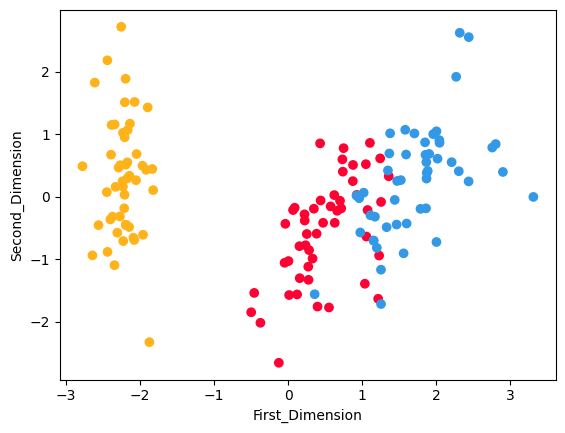

In [27]:
color1=(1.0, 0.7, 0.1, 1.0)
color2=(1.0, 0.0, 0.2, 1.0)
color3=(0.2, 0.6, 0.9, 1.0)
colormap = np.array([color1, color2, color3])

plt.scatter(components.values[:, 0], components.values[:, 1], c=colormap[df[['target']]])
plt.xlabel('First_Dimension')
plt.ylabel('Second_Dimension')
plt.show()

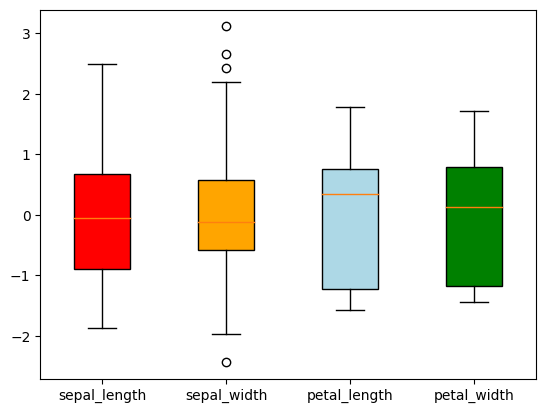

In [34]:
box = plt.boxplot(df.loc[:,df.columns != 'target'], patch_artist=True)

colors = ['red', 'orange', 'lightBlue', 'green']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks([1, 2, 3, 4], ['sepal_length','sepal_width','petal_length','petal_width'])
plt.show()